In [22]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../src")
from eda import EDA

### Data Extraction

We use the `yfinance` library to fetch daily historical data.
- **Tickers:** TSLA (High Growth/High Risk), BND (Stability/Income), SPY (Market Proxy).
- **Period:** January 1, 2015, to January 15, 2026.

In [2]:
eda = EDA()

In [3]:
tickers = ["TSLA", "BND", "SPY"]
raw_data = eda.fetch_data(tickers, "2015-01-01", "2026-01-15")

[*********************100%***********************]  3 of 3 completed


In [4]:
raw_data.head()

Ticker            BND                                                       \
Price            Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2015-01-02  82.430000  82.690002  82.419998  82.650002  60.385963  2218800   
2015-01-05  82.739998  82.919998  82.699997  82.889999  60.561321  5820100   
2015-01-06  83.029999  83.379997  83.029999  83.129997  60.736660  3887600   
2015-01-07  83.139999  83.279999  83.050003  83.180000  60.773201  2433400   
2015-01-08  83.110001  83.110001  82.970001  83.050003  60.678249  1873400   

Ticker             SPY                                                  \
Price             Open        High         Low       Close   Adj Close   
Date                                                                     
2015-01-02  206.380005  206.880005  204.179993  205.429993  170.589569   
2015-01-05  204.169998  204.369995  201.350006  201.720001  167.508804   
2015-01-06  202.089996  202.720001  198.860001  199.820007  165.931061   
2015-01-07  201.419998  202.720001  200.880005  202.309998  167.998734   
2015-01-08  204.009995  206.160004  203.990005  205.899994  170.979919   

Ticker                      TSLA                                              \
Price          Volume       Open       High        Low      Close  Adj Close   
Date                                                                           
2015-01-02  121465900  14.858000  14.883333  14.217333  14.620667  14.620667   
2015-01-05  169632600  14.303333  14.433333  13.810667  14.006000  14.006000   
2015-01-06  209151400  14.004000  14.280000  13.614000  14.085333  14.085333   
2015-01-07  125346700  14.223333  14.318667  13.985333  14.063333  14.063333   
2015-01-08  147217800  14.187333  14.253333  14.000667  14.041333  14.041333   

Ticker                
Price         Volume  
Date                  
2015-01-02  71466000  
2015-01-05  80527500  
2015-01-06  93928500  
2015-01-07  44526000  
2015-01-08  51637500

In [5]:
raw_data.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 2775 entries, 2015-01-02 to 2026-01-14
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (BND, Open)        2775 non-null   float64
 1   (BND, High)        2775 non-null   float64
 2   (BND, Low)         2775 non-null   float64
 3   (BND, Close)       2775 non-null   float64
 4   (BND, Adj Close)   2775 non-null   float64
 5   (BND, Volume)      2775 non-null   int64  
 6   (SPY, Open)        2775 non-null   float64
 7   (SPY, High)        2775 non-null   float64
 8   (SPY, Low)         2775 non-null   float64
 9   (SPY, Close)       2775 non-null   float64
 10  (SPY, Adj Close)   2775 non-null   float64
 11  (SPY, Volume)      2775 non-null   int64  
 12  (TSLA, Open)       2775 non-null   float64
 13  (TSLA, High)       2775 non-null   float64
 14  (TSLA, Low)        2775 non-null   float64
 15  (TSLA, Close)      2775 non-null   float64
 16  (TSLA, Adj Close)

### Missing Values

In [6]:
raw_data.isna().sum()

Ticker  Price    
BND     Open         0
        High         0
        Low          0
        Close        0
        Adj Close    0
        Volume       0
SPY     Open         0
        High         0
        Low          0
        Close        0
        Adj Close    0
        Volume       0
TSLA    Open         0
        High         0
        Low          0
        Close        0
        Adj Close    0
        Volume       0
dtype: int64

There are no missing values.

In [ ]:
data = eda.split_tickers(raw_data, tickers)

tsla = data["TSLA"]
bnd  = data["BND"]
spy  = data["SPY"]

### Data Cleaning & Understanding

In this step, we inspect the dataset for missing values, verify data types, and ensure the structure is ready for analysis. 
- **Missing Values:** We check for null entries to decide if interpolation or removal is necessary.
- **Data Types:** Dates must be in `datetime` format, and prices should be numerical (`float64`).

In [8]:
tsla.info()

<class 'pandas.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype        
---  ------     --------------  -----        
 0   Date       2775 non-null   datetime64[s]
 1   Open       2775 non-null   float64      
 2   High       2775 non-null   float64      
 3   Low        2775 non-null   float64      
 4   Close      2775 non-null   float64      
 5   Adj Close  2775 non-null   float64      
 6   Volume     2775 non-null   int64        
dtypes: datetime64[s](1), float64(5), int64(1)
memory usage: 151.9 KB


### Visualize the Distribution

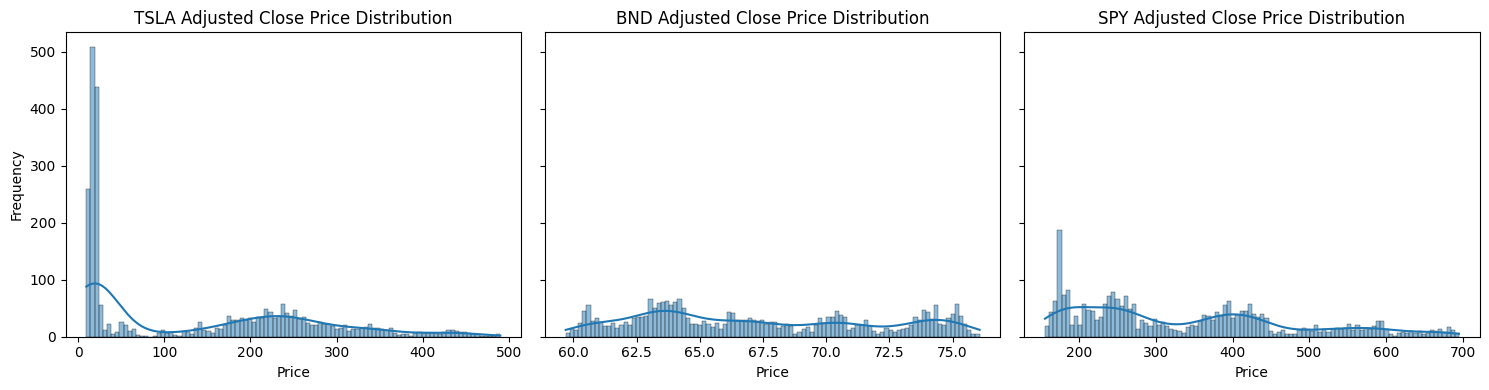

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15,4), sharey=True)

assets = [
    (tsla, "TSLA"),
    (bnd, "BND"),
    (spy, "SPY")
]

for ax, (df, label) in zip(axes, assets):
    sns.histplot(df["Adj Close"], bins=100, kde=True, ax=ax)
    ax.set_title(f"{label} Adjusted Close Price Distribution")
    ax.set_xlabel("Price")

axes[0].set_ylabel("Frequency")
plt.tight_layout()
plt.show()


### Outliers (Box Plots)

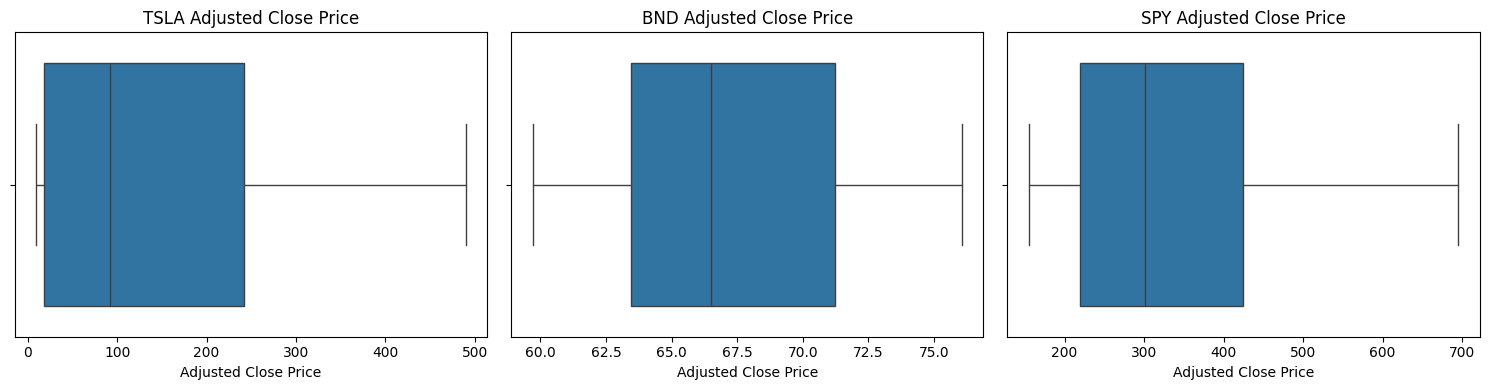

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15,4), sharey=False)

assets = [
    (tsla, "TSLA"),
    (bnd, "BND"),
    (spy, "SPY")
]

for ax, (df, label) in zip(axes, assets):
    sns.boxplot(x=df["Adj Close"], ax=ax)
    ax.set_title(f"{label} Adjusted Close Price")
    ax.set_xlabel("Adjusted Close Price")

plt.tight_layout()
plt.show()


### Exploratory Data Analysis (EDA)


#### Price Trends
We visualize the **Closing Price** over time to observe the long-term direction of each asset.

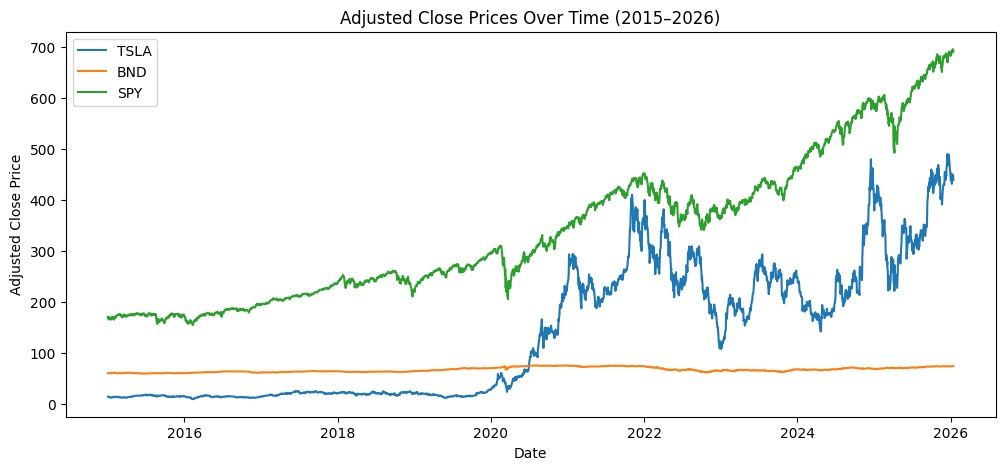

In [11]:
plt.figure(figsize=(12,5))
plt.plot(tsla["Date"], tsla["Adj Close"], label="TSLA")
plt.plot(bnd["Date"], bnd["Adj Close"], label="BND")
plt.plot(spy["Date"], spy["Adj Close"], label="SPY")
plt.title("Adjusted Close Prices Over Time (2015–2026)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.show()


### Volatility and Returns
Calculating **Daily Percentage Change** allows us to observe volatility. We further analyze this by calculating rolling means and standard deviations to understand short-term fluctuations and stability.

In [18]:
for df in [tsla, bnd, spy]:
    df["Daily Return"] = df["Adj Close"].pct_change()

tsla.dropna(inplace=True)
bnd.dropna(inplace=True)
spy.dropna(inplace=True)

### Returns & Volatility

#### Distribution of Daily Returns
In this section, we visualize the frequency of daily returns using Histograms and Kernel Density Estimate (KDE) plots.

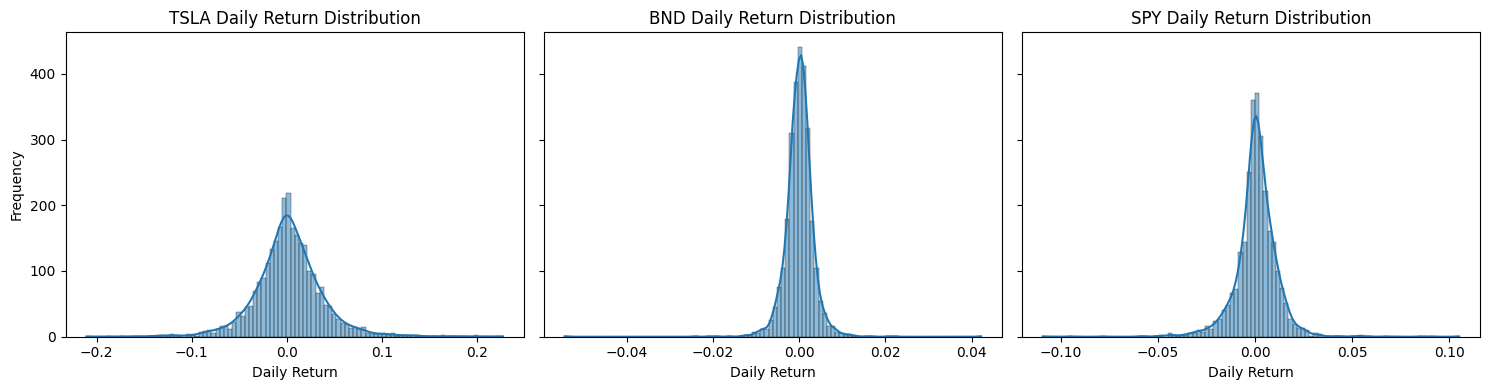

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15,4), sharey=True)

assets = [
    (tsla, "TSLA"),
    (bnd, "BND"),
    (spy, "SPY")
]

for ax, (df, label) in zip(axes, assets):
    sns.histplot(df["Daily Return"], bins=100, kde=True, ax=ax)
    ax.set_title(f"{label} Daily Return Distribution")
    ax.set_xlabel("Daily Return")

axes[0].set_ylabel("Frequency")
plt.tight_layout()
plt.show()


- **Normality:** Financial returns often exhibit "fat tails", meaning extreme events happen more often than a normal distribution would suggest.
- **Spread (Standard Deviation):** A wider "bell" for **TSLA** compared to **SPY** or **BND** indicates higher volatility.
- **Center:** The peak of the distribution shows the most frequent daily return (usually near 0.0%).

#### Rolling Statistics (Analyzing Volatility over Time)
We use a 30-day rolling window to calculate the mean and standard deviation. This helps us see how risk (standard deviation) changes during specific market events.

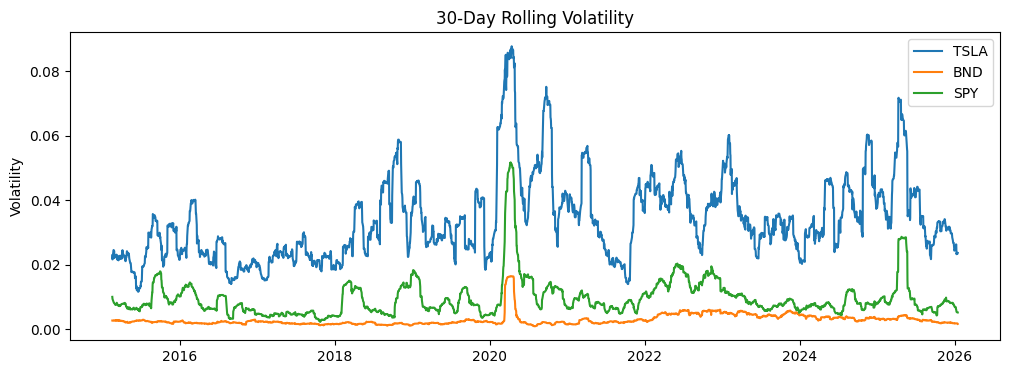

In [20]:
window = 30

plt.figure(figsize=(12,4))
plt.plot(tsla["Date"], tsla["Daily Return"].rolling(window).std(), label="TSLA")
plt.plot(bnd["Date"], bnd["Daily Return"].rolling(window).std(), label="BND")
plt.plot(spy["Date"], spy["Daily Return"].rolling(window).std(), label="SPY")
plt.title("30-Day Rolling Volatility")
plt.ylabel("Volatility")
plt.legend()
plt.show()

- **Rolling Mean:** Shows the short-term trend. If it stays above zero, the asset is in a short-term uptrend.
- **Rolling Std Dev:** This is our proxy for risk. Spikes in this line represent periods of high market stress or "shocks." TSLA's volatility spikes significantly more than SPY's during market downturns.

### Returns-Based Outlier Detection

We identify significant anomalies in daily returns. Unusually high or low returns can indicate market shocks or specific company events (especially for TSLA).

In [23]:
def detect_outliers(df, return_col="Daily Return", threshold=3):
    std = df[return_col].std()
    return df[np.abs(df[return_col]) > threshold * std]

In [24]:
tsla_outliers = detect_outliers(tsla)
bnd_outliers  = detect_outliers(bnd)
spy_outliers  = detect_outliers(spy)

print("TSLA outliers:", tsla_outliers.shape[0])
print("BND outliers:", bnd_outliers.shape[0])
print("SPY outliers:", spy_outliers.shape[0])


TSLA outliers: 48
BND outliers: 31
SPY outliers: 36


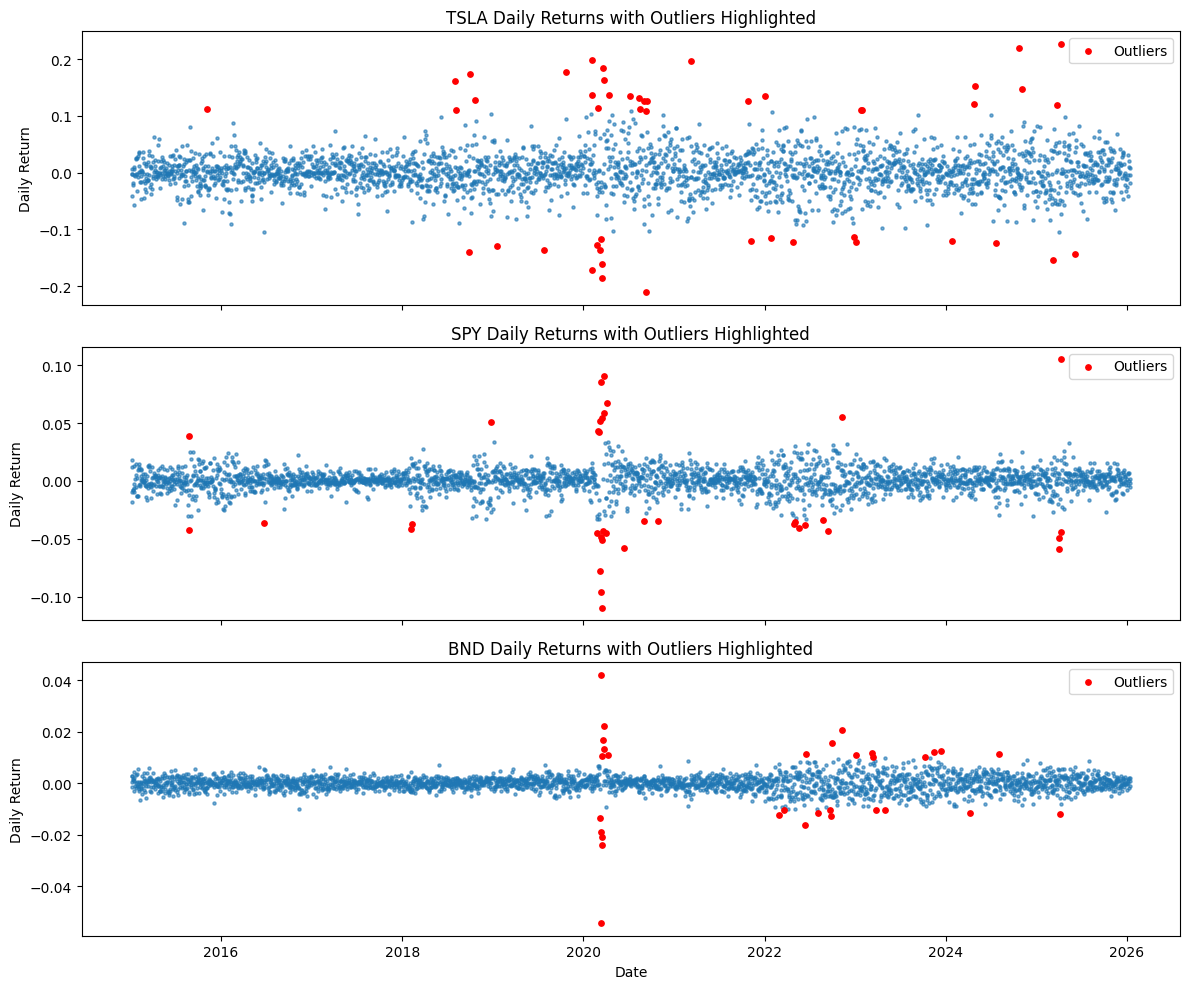

In [25]:
fig, axes = plt.subplots(3, 1, figsize=(12,10), sharex=True)

assets = [
    (tsla, tsla_outliers, "TSLA"),
    (spy, spy_outliers, "SPY"),
    (bnd, bnd_outliers, "BND")
]

for ax, (df, outliers, label) in zip(axes, assets):
    ax.scatter(df["Date"], df["Daily Return"], s=5, alpha=0.6)
    ax.scatter(outliers["Date"], outliers["Daily Return"],
               color="red", s=15, label="Outliers")
    ax.set_title(f"{label} Daily Returns with Outliers Highlighted")
    ax.set_ylabel("Daily Return")
    ax.legend()

plt.xlabel("Date")
plt.tight_layout()
plt.show()

#### Days with unusually high or low returns

In [26]:
def split_outliers(df, return_col="Daily Return", threshold=3):
    std = df[return_col].std()
    high = df[df[return_col] >  threshold * std]
    low  = df[df[return_col] < -threshold * std]
    return high, low

tsla_high, tsla_low = split_outliers(tsla)
spy_high, spy_low   = split_outliers(spy)
bnd_high, bnd_low   = split_outliers(bnd)

extreme_summary = pd.DataFrame({
    "Asset": ["TSLA", "SPY", "BND"],
    "High-Return Days": [tsla_high.shape[0], spy_high.shape[0], bnd_high.shape[0]],
    "Low-Return Days":  [tsla_low.shape[0], spy_low.shape[0], bnd_low.shape[0]]
})

print(extreme_summary)


  Asset  High-Return Days  Low-Return Days
0  TSLA                29               19
1   SPY                12               24
2   BND                16               15


### Seasonality and Trend Analysis – Augmented Dickey-Fuller (ADF) Test

To prepare for forecasting models like ARIMA, we must check if the time series is **stationary**. 
- **Statistical Test:** We use the Augmented Dickey-Fuller (ADF) test.
- **Implication:** If the series is non-stationary ($p-value > 0.05$), differencing ($d$) will be required to stabilize the mean.

In [27]:
from statsmodels.tsa.stattools import adfuller

def adf_test(df, column="Adj Close", asset_name="Asset"):
    result = adfuller(df[column].dropna())
    print(f"\nADF Test for {asset_name} ({column}):")
    print(f"  Test Statistic: {result[0]:.4f}")
    print(f"  p-value: {result[1]:.4f}")
    print(f"  Critical Values: {result[4]}")
    if result[1] < 0.05:
        print("  => Reject H0: Series is stationary")
    else:
        print("  => Fail to reject H0: Series is non-stationary")
    return result

# Closing Prices
tsla_adf = adf_test(tsla, "Adj Close", "TSLA")
spy_adf  = adf_test(spy, "Adj Close", "SPY")
bnd_adf  = adf_test(bnd, "Adj Close", "BND")

# Daily Returns
tsla_return_adf = adf_test(tsla, "Daily Return", "TSLA Daily Return")
spy_return_adf  = adf_test(spy, "Daily Return", "SPY Daily Return")
bnd_return_adf  = adf_test(bnd, "Daily Return", "BND Daily Return")



ADF Test for TSLA (Adj Close):
  Test Statistic: -0.7803
  p-value: 0.8249
  Critical Values: {'1%': np.float64(-3.432734490222307), '5%': np.float64(-2.8625934964497826), '10%': np.float64(-2.567330809950863)}
  => Fail to reject H0: Series is non-stationary

ADF Test for SPY (Adj Close):
  Test Statistic: 1.1820
  p-value: 0.9959
  Critical Values: {'1%': np.float64(-3.432718083748152), '5%': np.float64(-2.862586250752157), '10%': np.float64(-2.5673269523447004)}
  => Fail to reject H0: Series is non-stationary

ADF Test for BND (Adj Close):
  Test Statistic: -1.0297
  p-value: 0.7423
  Critical Values: {'1%': np.float64(-3.4327215189534854), '5%': np.float64(-2.862587767867471), '10%': np.float64(-2.5673277600556608)}
  => Fail to reject H0: Series is non-stationary

ADF Test for TSLA Daily Return (Daily Return):
  Test Statistic: -53.0196
  p-value: 0.0000
  Critical Values: {'1%': np.float64(-3.4327103908048398), '5%': np.float64(-2.862582853253982), '10%': np.float64(-2.56732514

- **Null Hypothesis ($H_0$):** The series has a unit root (is non-stationary).
- **Test Statistic vs. Critical Values:** If the Test Statistic is more negative than the Critical Value, we reject $H_0$.
- **P-Value:** If P < 0.05, the data is stationary.

**Analysis of Results:**
- **Closing Prices:** Usually have a P > 0.05, meaning they are **non-stationary** and require differencing.
- **Daily Returns:** Usually have a $P \approx 0$, meaning they are **stationary** and can be modeled directly.

### Risk Metrics Calculation

We calculate foundational metrics to compare the risk-return profile of the assets:
- **Value at Risk (VaR):** Estimates the potential loss at a 95% confidence level.
- **Sharpe Ratio:** Measures the risk-adjusted return (Excess return per unit of volatility).

In [28]:
def risk_metrics(df, return_col="Daily Return", risk_free_rate=0.01):
    # Daily VaR at 95% confidence
    var_95 = np.percentile(df[return_col].dropna(), 5)
    
    # Annualized Sharpe Ratio
    mean_daily = df[return_col].mean()
    std_daily  = df[return_col].std()
    sharpe_ratio = (mean_daily*252 - risk_free_rate) / (std_daily * np.sqrt(252))
    
    return var_95, sharpe_ratio

metrics = []
for df, label in zip([tsla, spy, bnd], ["TSLA", "SPY", "BND"]):
    var_95, sharpe = risk_metrics(df)
    metrics.append([label, var_95, sharpe])

metrics_df = pd.DataFrame(metrics, columns=["Asset", "VaR (95%)", "Sharpe Ratio"])
print(metrics_df)

  Asset  VaR (95%)  Sharpe Ratio
0  TSLA  -0.052529      0.805852
1   SPY  -0.016719      0.747709
2   BND  -0.004796      0.194778


**1. Value at Risk (VaR 95%):**
- **TSLA (-0.0525):** There is a 5% chance that Tesla will lose more than **5.25%** of its value in a single day.
- **BND (-0.0047):** In contrast, the bond ETF only risks a **0.47%** loss under the same confidence level.
- **Insight:** TSLA is more than 10x riskier than BND on a daily basis.

**2. Sharpe Ratio:**
- **TSLA (0.805):** Despite the high risk, Tesla offers the highest return per unit of risk in this dataset.
- **SPY (0.747):** The market average is slightly lower than Tesla, showing that the extra risk in TSLA was historically rewarded.
- **BND (0.194):** While safe, the returns relative to the risk are much lower, which is typical for fixed-income assets in growth-heavy periods.

### 6. Summary of Findings and Insights
#### Data Quality
- The dataset was found to be clean with no missing values.
- All data types were correctly identified as numeric or datetime.

#### Key Insights
- **Tesla (TSLA):** Shows high volatility but significant upward trends over the period.
- **Market Comparison:** SPY provides steady growth, while BND remains the most stable with the lowest VaR.
- **Stationarity:** Closing prices were non-stationary, but daily returns were stationary, suggesting that a first-order difference ($d=1$) is appropriate for modeling.